In [1]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Load the dataset
car_mpg_dataset = pd.read_csv("A1-car-mpg.txt", header=0, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
#Clean the dataset
car_mpg_dataset.drop(columns=['Car_Model'], inplace=True)
car_mpg_dataset.dropna(inplace=True)
x = car_mpg_dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin']]
y = car_mpg_dataset[["MPG"]]

origin = car_mpg_dataset.pop('Origin')

car_mpg_dataset['USA'] = (origin == 1)*1.0
car_mpg_dataset['Europe'] = (origin == 2)*1.0
car_mpg_dataset['Japan'] = (origin == 3)*1.0

#Scale the data 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.20, shuffle=True)

Epoch 1/100
10/10 [==============================] - 1s 45ms/step - loss: 0.0833 - mae: 0.2290 - val_loss: 0.0334 - val_mae: 0.1516
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0449 - mae: 0.1780 - val_loss: 0.0334 - val_mae: 0.1516
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0448 - mae: 0.1789 - val_loss: 0.0331 - val_mae: 0.1509
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.1765 - val_loss: 0.0338 - val_mae: 0.1525
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.1786 - val_loss: 0.0327 - val_mae: 0.1497
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0437 - mae: 0.1755 - val_loss: 0.0320 - val_mae: 0.1481
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0428 - mae: 0.1742 - val_loss: 0.0313 - val_mae: 0.1463
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0416 - 

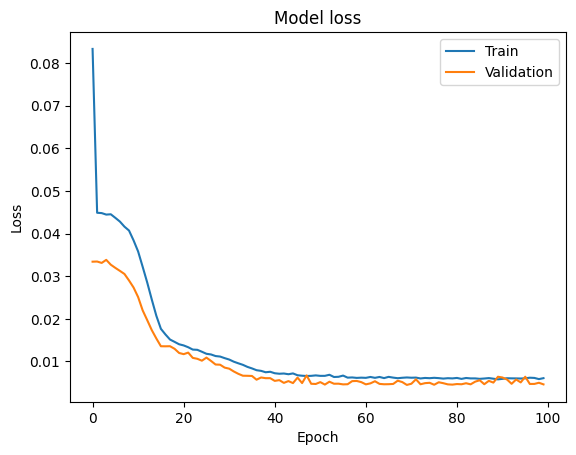

In [4]:
# Part 2: Implementation of NN
from tensorflow import keras as keras
from matplotlib import pyplot as plt

model = keras.models.Sequential([
    keras.layers.Dense(4, input_shape=(x_train.shape[1],) ,activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.5)
model.compile(loss='mse', metrics=['mae'],optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


10/10 [==============================] - 0s 2ms/step
---Test---
R2 Score:  0.8632578109720641
MSE:  0.004619113505866736
MAE:  0.05313228673925947
---Train---
R2 Score:  0.8598560814139913
MSE:  0.006314262936819971
MAE:  0.05750411562080602

MAPE:  0.16337546955542648


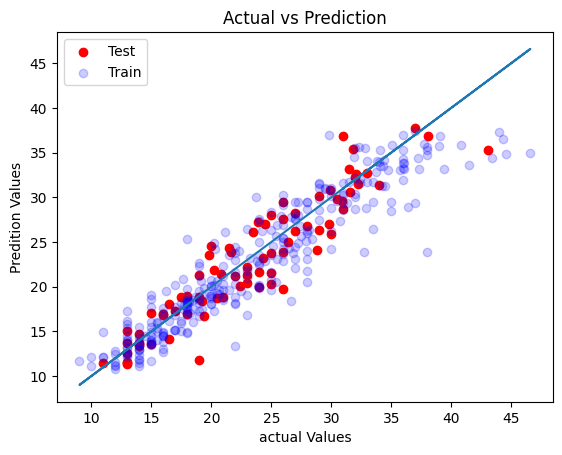

In [5]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y)
plt.legend()
plt.show()
